In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/raw.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
print("categories in 'gender' variable:-", end=' ')
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:-", end=' ')
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable:-", end=' ')
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:-", end=' ')
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable:-", end=' ')
print(df['test_preparation_course'].unique())


categories in 'gender' variable:- ['female' 'male']
Categories in 'race_ethnicity' variable:- ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:- ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:- ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:- ['none' 'completed']


In [10]:
numeric_feature = [feature for feature in df.columns if df[feature].dtype !='O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype =='O']

print("we have {} Numerical features:-{}".format(len(numeric_feature), numeric_feature))
print("we have {} Categorical features:-{}".format(len(categorical_feature), categorical_feature))

we have 3 Numerical features:-['math_score', 'reading_score', 'writing_score']
we have 5 Categorical features:-['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [11]:
df['total score'] = df['math_score']+df['reading_score']+df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [12]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f"NUmber of students with full marks in reading:- {reading_full}")
print(f"NUmber of students with full marks in writing:- {writing_full}")
print(f"NUmber of students with full marks in math:- {math_full}")

NUmber of students with full marks in reading:- 17
NUmber of students with full marks in writing:- 14
NUmber of students with full marks in math:- 7


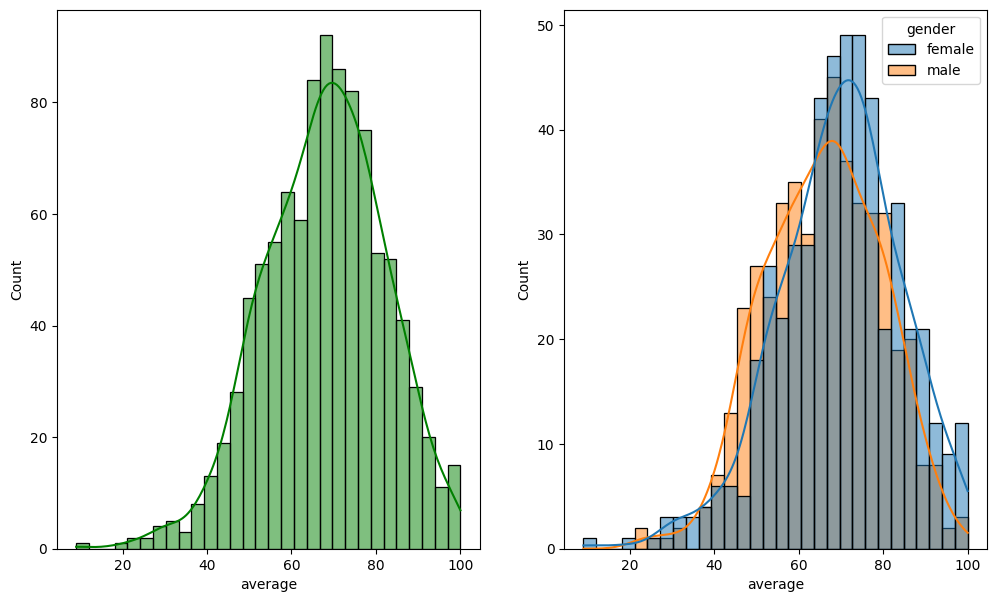

In [17]:
fig, axs = plt.subplots(1,2, figsize=(12,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', bins=30, kde=True, hue='gender')
plt.show()
